# CS171 Final Project - Classifying Animal Images
### By Anton Clayton
#### Dataset Link: https://www.kaggle.com/datasets/alessiocorrado99/animals10

## 1. Data Preprocessing

## OPTION 1: If you put the dataset ZIP file into google drive
Run this if the file animals-dataset.zip is already in your Drive folder.


In [ ]:
from google.colab import drive

# Mount Drive
drive.mount('/content/drive')
print("Google Drive mounted successfully.")

In [ ]:
import shutil
import os

# Copy and Unzip
# Update this path if zip is named differently or in a different folder
drive_zip_path = '/content/drive/MyDrive/CS171_animals_dataset/animals-dataset.zip'
local_extract_path = '/content/animal_data'

print("Copying and unzipping from Drive...")
shutil.copy(drive_zip_path, '/content/temp.zip')
shutil.unpack_archive('/content/temp.zip', local_extract_path)

# Setup variables for loop
base_path = f'{local_extract_path}/raw-img'
image_filepaths = []
image_labels = []

print(f"'base_path' is set to: {base_path}")

Copying and unzipping from Drive...
'base_path' is set to: /content/animal_data/raw-img


## OPTION 2: If you upload the dataset ZIP file locally/manually
Run this if you just dragged and dropped animals-dataset.zip into the Colab "Files" sidebar.

In [ ]:
import shutil
import os

# 1. Unzip the uploaded file
# Make sure the uploaded file is named exactly this, or change the string below
uploaded_zip_name = 'animals-dataset.zip'
local_zip_path = f'/content/{uploaded_zip_name}'
local_extract_path = '/content/animal_data'

if os.path.exists(local_zip_path):
    print(f"Unzipping {uploaded_zip_name}...")
    shutil.unpack_archive(local_zip_path, local_extract_path)

    # Setup variables for loop
    base_path = f'{local_extract_path}/raw-img'
    image_filepaths = []
    image_labels = []

    print(f"Done! 'base_path' is set to: {base_path}")
else:
    print(f"Error: Could not find '{uploaded_zip_name}'. Did you upload it to the Files sidebar?")

Unzipping animals-dataset.zip...
Done! 'base_path' is set to: /content/animal_data/raw-img


## Sections 1 - 2 (Data Preprocessing)

## 1.1 Loading Images
- Limited to 1000 images per animal to ensure a balanced dataset and reduce excessive image processing time.

In [ ]:
from collections import defaultdict
# Initialize a defaultdict to count images per class, limited to 1000
class_counts = defaultdict(int)
limit_per_class = 1000

print(f"Starting image collection with a limit of {limit_per_class} images per class...")

for class_name in os.listdir(base_path):
    class_path = os.path.join(base_path, class_name)
    if os.path.isdir(class_path):
        # Only process if the class count is below the limit or not yet started
        if class_counts[class_name] < limit_per_class:
            for img_name in os.listdir(class_path):
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    if class_counts[class_name] < limit_per_class:
                        img_path = os.path.join(class_path, img_name)
                        image_filepaths.append(img_path)
                        image_labels.append(class_name)
                        class_counts[class_name] += 1
                    else:
                        # Already collected 1000 images for this class, move to next file
                        break # Exit inner loop for this class

print(f"Finished collecting image paths. Total image paths collected: {len(image_filepaths)}")
print("Number of images collected per class (limited to 1000):")
for class_name, count in class_counts.items():
    print(f"- {class_name}: {count}")

Starting image collection with a limit of 1000 images per class...
Finished collecting image paths. Total image paths collected: 10000
Number of images collected per class (limited to 1000):
- cavallo: 1000
- cane: 1000
- pecora: 1000
- mucca: 1000
- farfalla: 1000
- scoiattolo: 1000
- gallina: 1000
- ragno: 1000
- gatto: 1000
- elefante: 1000


## 1.2 Verify Dataset and Check Image Dimensions
- Here, I perform a sanity check on the loaded data. This step validates the class distribution to ensure our limit was applied correctly and inspects the pixel dimensions of sample images

In [ ]:
import collections
from PIL import Image

# Print the total number of images
print(f"Total number of images loaded: {len(image_filepaths)}")

# Count and display the number of images for each class to confirm 1000
class_counts = collections.Counter(image_labels)
print("\nNumber of images per class:")
for class_name, count in class_counts.items():
    print(f"- {class_name}: {count}")

# Select and display the dimensions of a few sample images
print("\nDimensions of a few sample images:")
# Display dimensions for the first 5 images just to see
for i in range(min(5, len(image_filepaths))):
    img_path = image_filepaths[i]
    try:
        with Image.open(img_path) as img_obj:
            print(f"- Image {i+1} (Class: {image_labels[i]}): {img_obj.size[0]}x{img_obj.size[1]} pixels")
    except Exception as e:
        print(f"- Could not open image {img_path}: {e}")

# Display dimensions for a few images from the middle of the dataset just to see
if len(image_filepaths) > 10:
    for i in range(len(image_filepaths) // 2, min(len(image_filepaths) // 2 + 3, len(image_filepaths))):
        img_path = image_filepaths[i]
        try:
            with Image.open(img_path) as img_obj:
                print(f"- Image {i+1} (Class: {image_labels[i]}): {img_obj.size[0]}x{img_obj.size[1]} pixels")
        except Exception as e:
            print(f"- Could not open image {img_path}: {e}")

Total number of images loaded: 10000

Number of images per class:
- cavallo: 1000
- cane: 1000
- pecora: 1000
- mucca: 1000
- farfalla: 1000
- scoiattolo: 1000
- gallina: 1000
- ragno: 1000
- gatto: 1000
- elefante: 1000

Dimensions of a few sample images:
- Image 1 (Class: cavallo): 300x200 pixels
- Image 2 (Class: cavallo): 300x212 pixels
- Image 3 (Class: cavallo): 300x247 pixels
- Image 4 (Class: cavallo): 206x300 pixels
- Image 5 (Class: cavallo): 300x225 pixels
- Image 5001 (Class: scoiattolo): 200x300 pixels
- Image 5002 (Class: scoiattolo): 300x201 pixels
- Image 5003 (Class: scoiattolo): 300x200 pixels


## 1.3 Translate Italian Animal Labels to English
- Also, perform sanity check again for animal dataset distribution (1000 in each class)

In [ ]:
# Map labels from Italian to English
translation_map = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "scoiattolo": "squirrel",
    "ragno": "spider"
}

# Translate labels in-place
for i in range(len(image_labels)):
    image_labels[i] = translation_map.get(image_labels[i], image_labels[i])

print("Labels translated successfully.")

# Verify a few sample translated labels
print("\nSample translated labels (first 5):")
for i in range(min(5, len(image_labels))):
    print(f"- {image_labels[i]}")

# Pprint counts of each translated label (sanity check)
from collections import Counter
translated_class_counts = Counter(image_labels)
print("\nNumber of images per translated class:")
for class_name, count in translated_class_counts.items():
    print(f"- {class_name}: {count}")

Labels translated successfully.

Sample translated labels (first 5):
- horse
- horse
- horse
- horse
- horse

Number of images per translated class:
- horse: 1000
- dog: 1000
- sheep: 1000
- cow: 1000
- butterfly: 1000
- squirrel: 1000
- chicken: 1000
- spider: 1000
- cat: 1000
- elephant: 1000


## 2.1 Split images into standard 80-20 testing split
- Then confirm training and testing set class distribution (800 for each label in training and 200 for each label in testing)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    image_filepaths,
    image_labels,
    test_size=0.2,
    stratify=image_labels,
    random_state=42
)

print(f"Total processed images: {len(image_filepaths)}")
print(f"Training set size: {len(X_train)} images")
print(f"Testing set size: {len(X_test)} images")

# Verify the class distribution in training and testing sets
from collections import Counter

print("\nTraining set class distribution:")
for label, count in Counter(y_train).items():
    print(f"- {label}: {count}")

print("\nTesting set class distribution:")
for label, count in Counter(y_test).items():
    print(f"- {label}: {count}")

Total processed images: 10000
Training set size: 8000 images
Testing set size: 2000 images

Training set class distribution:
- dog: 800
- cat: 800
- elephant: 800
- squirrel: 800
- horse: 800
- spider: 800
- butterfly: 800
- sheep: 800
- cow: 800
- chicken: 800

Testing set class distribution:
- dog: 200
- elephant: 200
- cow: 200
- chicken: 200
- sheep: 200
- spider: 200
- cat: 200
- horse: 200
- butterfly: 200
- squirrel: 200


## 2.2 Set up Transformations to Train and test datasets
- Training is given many transformations like horizontal flip, rotation, and color jitter to prevent memorization of training data (help prevent overfitting)
- Testing is only given resize and normalization for formatting

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split
from PIL import Image

# Define Transforms (both produce 3x224x224 tensor)
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),        # Resize slightly larger for next step
    transforms.RandomHorizontalFlip(),    # Flip horizontally (Augmentation)
    transforms.RandomRotation(15),        # Rotate image +/- 15 degrees (augmentation)
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # random lighting changes (hopefully prevent focus on color and more on shape)
    transforms.ToTensor(),                # Converts to [0,1] (replaces / 255.0)
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Standard ImageNet stats
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),        # specific target size (for consistency)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

## 2.3a Lazy Loading Dataset class to avoid RAM/memory issues in Colab
- stores only file paths in memory
- standardizes input (RGB)
- applies transformations

In [ ]:
# Lazy-Loading Dataset (to avoid Colab RAM/memory issues)
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, labels, label_to_int, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.label_to_int = label_to_int
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load image ONLY when training loop asks for it
        img_path = self.image_paths[idx]
        # .convert('RGB') fixes the grayscale/RGBA issues automatically
        image = Image.open(img_path).convert('RGB')

        label_str = self.labels[idx]
        label_int = self.label_to_int[label_str]

        if self.transform:
            image = self.transform(image)

        return image, label_int

## 2.3b Initializing DataLoaders with Batching & Optimization
- convert class names to integer indices

In [ ]:
# Create Datasets and Loaders
unique_labels = sorted(list(set(image_labels)))
label_to_int = {label: i for i, label in enumerate(unique_labels)}

train_dataset = CustomImageDataset(X_train, y_train, label_to_int, transform=train_transforms)
test_dataset = CustomImageDataset(X_test, y_test, label_to_int, transform=test_transforms)

BATCH_SIZE = 32
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    pin_memory=True,
    persistent_workers=True
)
test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2,
    pin_memory=True,
    persistent_workers=True
)

print(f"Train Loader ready with {len(train_dataset)} images.")
print(f"Test Loader ready with {len(test_dataset)} images.")

Train Loader ready with 8000 images.
Test Loader ready with 2000 images.


## 3.1 Model Construction
#### Defining the Custom CNN Architecture
1.  **Convolutional Blocks (The Feature Extractor):**
    * The network uses **5 blocks** of Convolution layers.
    * In each block, double the number of channels (32 → 64 → ... → 512) to capture increasingly complex features.
    * Uses **Max Pooling** after every block to halve the spatial dimensions (ending at 7x7), reducing computation and forcing the model to learn robust features.
    * **Batch Normalization** is applied after every convolution to stabilize training and speed up convergence.

2.  **Fully Connected Layers (The Classifier):**
    * The 3D feature maps are **Flattened** into a 1D vector.
    * A dense hidden layer (1024 units) interprets these features.
    * **Dropout (50%)** is applied to randomly deactivate neurons during training to prevent overfitting


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class AnimalClassificationCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(AnimalClassificationCNN, self).__init__()

        # --- CONVOLUTIONAL LAYERS ---
        # Block 1: Input (3, 224, 224) -> Output (32, 112, 112)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # Reduces Image Size by half

        # Block 2: Input (32, 112, 112) -> Output (64, 56, 56)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # Block 3: Input (64, 56, 56) -> Output (128, 28, 28)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # Block 4: Input (128, 28, 28) -> Output (256, 14, 14)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)

        # Block 5: Input (256, 14, 14) -> Output (512, 7, 7)
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(512)

        # --- FULLY CONNECTED LAYERS ---
        # The input to the linear layer is: Channels * Height * Width
        # Based on above: 512 * 7 * 7 = 25,088 features
        self.flatten_size = 512 * 7 * 7

        self.fc1 = nn.Linear(self.flatten_size, 1024)
        self.dropout = nn.Dropout(0.5) # Help prevent overfitting
        self.fc2 = nn.Linear(1024, num_classes) # Output layer (10 classes)

    def forward(self, x):
        # Block 1
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        # Block 2
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        # Block 3
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        # Block 4
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        # Block 5
        x = self.pool(F.relu(self.bn5(self.conv5(x))))

        # Flatten: Turn the 3D image cubes into a 1D vector
        x = x.view(-1, self.flatten_size)

        # Classification Head
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

## 3.2 Initialize Model
- Preferably using GPU to train for speed
- Loss Function: Cross Entropy Loss
- Optimizer: Adam Optimizer


In [ ]:
import torch.optim as optim

# Preferably use cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on device: {device}")

# --- PARAMETERS & SETUP ---
num_epochs = 50
model = AnimalClassificationCNN(num_classes=10).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning Rate Scheduler
# Reduces LR by a factor of 0.1 if validation accuracy does not improve for 3 epochs
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='max', factor=0.1, patience=3
)

print("Model initialized successfully.")


Training on device: cuda
Model initialized successfully.


## 3.2 Training and Validation loop
Run the main training loop for **50 epochs**. Each epoch consists of two distinct phases:

1.  **Training Phase (`model.train()`):**
    * The model iterates through the training dataset in batches.
    * It performs a **forward pass** to make predictions and a **backward pass** to calculate gradients.
    * The optimizer updates the model's weights to minimize the loss.

2.  **Validation Phase (`model.eval()`):**
    * Switch the model to evaluation mode (disabling Dropout and freezing Batch Normalization layers).
    * Measure performance on unseen data to check for overfitting.

**Dynamic Learning Rate:**
Utilizing a `ReduceLROnPlateau` scheduler. If the validation accuracy stops improving for **3 epochs**, the scheduler automatically reduces the learning rate by a factor of **0.1**, allowing the model to fine-tune its weights more precisely (especially at later epochs).

In [ ]:
from tqdm.auto import tqdm
import torch.optim as optim

# Metric tracking
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

print("Starting Training Loop...")

for epoch in range(num_epochs):
    # --- TRAINING PHASE ---
    model.train()  # Set model to training mode (enables Dropout/BatchNorm)
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", unit="batch")

    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and Optimization
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Compute gradients via backpropagation
        optimizer.step()       # Update weights

        # Accumulate metrics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        progress_bar.set_postfix(loss=loss.item())

    # Calculate average training metrics for the epoch
    avg_train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct_train / total_train

    # --- VALIDATION PHASE ---
    model.eval()  # Set model to evaluation mode (disables Dropout/BatchNorm)
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0

    # Disable gradient calculation for inference (saves memory and computation)
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    avg_val_loss = val_running_loss / len(test_loader)
    val_acc = 100 * correct_val / total_val

    # --- SCHEDULER STEP ---
    # Update learning rate based on current validation accuracy
    scheduler.step(val_acc)

    # Record history
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}% | LR: {optimizer.param_groups[0]['lr']:.6f}")

print("Training Complete!")

Starting Training Loop...


Epoch 1/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [1/50] Train Acc: 15.55% | Val Acc: 21.20% | LR: 0.001000


Epoch 2/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [2/50] Train Acc: 20.89% | Val Acc: 27.70% | LR: 0.001000


Epoch 3/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [3/50] Train Acc: 24.11% | Val Acc: 29.75% | LR: 0.001000


Epoch 4/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [4/50] Train Acc: 25.93% | Val Acc: 36.55% | LR: 0.001000


Epoch 5/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [5/50] Train Acc: 29.21% | Val Acc: 40.75% | LR: 0.001000


Epoch 6/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [6/50] Train Acc: 30.43% | Val Acc: 39.20% | LR: 0.001000


Epoch 7/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [7/50] Train Acc: 32.24% | Val Acc: 37.30% | LR: 0.001000


Epoch 8/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [8/50] Train Acc: 34.20% | Val Acc: 43.80% | LR: 0.001000


Epoch 9/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [9/50] Train Acc: 35.16% | Val Acc: 46.15% | LR: 0.001000


Epoch 10/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [10/50] Train Acc: 36.79% | Val Acc: 46.85% | LR: 0.001000


Epoch 11/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [11/50] Train Acc: 38.01% | Val Acc: 50.75% | LR: 0.001000


Epoch 12/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [12/50] Train Acc: 40.48% | Val Acc: 51.45% | LR: 0.001000


Epoch 13/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [13/50] Train Acc: 41.86% | Val Acc: 52.15% | LR: 0.001000


Epoch 14/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [14/50] Train Acc: 43.26% | Val Acc: 52.80% | LR: 0.001000


Epoch 15/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [15/50] Train Acc: 45.38% | Val Acc: 55.85% | LR: 0.001000


Epoch 16/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [16/50] Train Acc: 48.17% | Val Acc: 58.80% | LR: 0.001000


Epoch 17/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [17/50] Train Acc: 49.99% | Val Acc: 59.70% | LR: 0.001000


Epoch 18/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [18/50] Train Acc: 51.15% | Val Acc: 58.95% | LR: 0.001000


Epoch 19/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [19/50] Train Acc: 53.05% | Val Acc: 63.10% | LR: 0.001000


Epoch 20/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [20/50] Train Acc: 54.84% | Val Acc: 58.95% | LR: 0.001000


Epoch 21/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [21/50] Train Acc: 55.44% | Val Acc: 65.00% | LR: 0.001000


Epoch 22/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [22/50] Train Acc: 57.30% | Val Acc: 63.90% | LR: 0.001000


Epoch 23/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [23/50] Train Acc: 57.96% | Val Acc: 64.30% | LR: 0.001000


Epoch 24/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [24/50] Train Acc: 59.91% | Val Acc: 63.95% | LR: 0.001000


Epoch 25/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [25/50] Train Acc: 60.38% | Val Acc: 61.40% | LR: 0.000100


Epoch 26/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [26/50] Train Acc: 64.29% | Val Acc: 72.30% | LR: 0.000100


Epoch 27/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [27/50] Train Acc: 64.83% | Val Acc: 72.30% | LR: 0.000100


Epoch 28/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [28/50] Train Acc: 67.08% | Val Acc: 72.10% | LR: 0.000100


Epoch 29/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [29/50] Train Acc: 67.14% | Val Acc: 72.00% | LR: 0.000100


Epoch 30/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [30/50] Train Acc: 67.53% | Val Acc: 73.00% | LR: 0.000100


Epoch 31/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [31/50] Train Acc: 67.76% | Val Acc: 72.95% | LR: 0.000100


Epoch 32/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [32/50] Train Acc: 68.17% | Val Acc: 73.45% | LR: 0.000100


Epoch 33/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [33/50] Train Acc: 67.86% | Val Acc: 73.10% | LR: 0.000100


Epoch 34/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [34/50] Train Acc: 68.59% | Val Acc: 73.20% | LR: 0.000100


Epoch 35/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [35/50] Train Acc: 68.86% | Val Acc: 72.70% | LR: 0.000100


Epoch 36/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [36/50] Train Acc: 68.83% | Val Acc: 73.50% | LR: 0.000100


Epoch 37/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [37/50] Train Acc: 69.12% | Val Acc: 73.40% | LR: 0.000100


Epoch 38/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [38/50] Train Acc: 70.45% | Val Acc: 74.45% | LR: 0.000100


Epoch 39/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [39/50] Train Acc: 69.74% | Val Acc: 73.05% | LR: 0.000100


Epoch 40/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [40/50] Train Acc: 69.21% | Val Acc: 73.45% | LR: 0.000100


Epoch 41/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [41/50] Train Acc: 70.15% | Val Acc: 73.90% | LR: 0.000100


Epoch 42/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [42/50] Train Acc: 69.88% | Val Acc: 73.10% | LR: 0.000010


Epoch 43/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [43/50] Train Acc: 71.46% | Val Acc: 74.20% | LR: 0.000010


Epoch 44/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [44/50] Train Acc: 71.16% | Val Acc: 74.25% | LR: 0.000010


Epoch 45/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [45/50] Train Acc: 71.44% | Val Acc: 74.60% | LR: 0.000010


Epoch 46/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [46/50] Train Acc: 70.86% | Val Acc: 74.55% | LR: 0.000010


Epoch 47/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [47/50] Train Acc: 71.50% | Val Acc: 74.20% | LR: 0.000010


Epoch 48/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [48/50] Train Acc: 71.29% | Val Acc: 74.50% | LR: 0.000010


Epoch 49/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [49/50] Train Acc: 71.54% | Val Acc: 74.85% | LR: 0.000010


Epoch 50/50 [Train]:   0%|          | 0/250 [00:00<?, ?batch/s]

Epoch [50/50] Train Acc: 71.55% | Val Acc: 74.70% | LR: 0.000010
Training Complete!


## 4. Analysis and Visualization

### 4.1 Loss and Accuracy Plots
- Accuracy for training is lower than the test because training dataset has many transformations that make it more difficult for the model to classify images correctly (e.g., random rotations, lighting changes, and flips). Furthermore, the model utilizes Dropout during the training phase, which randomly deactivates 50% of the neurons to prevent overfitting. In contrast, during the validation/test phase, these augmentations are removed, and Dropout is disabled, allowing the model to use its full capacity on 'clean' images, leading to naturally higher accuracy scores.

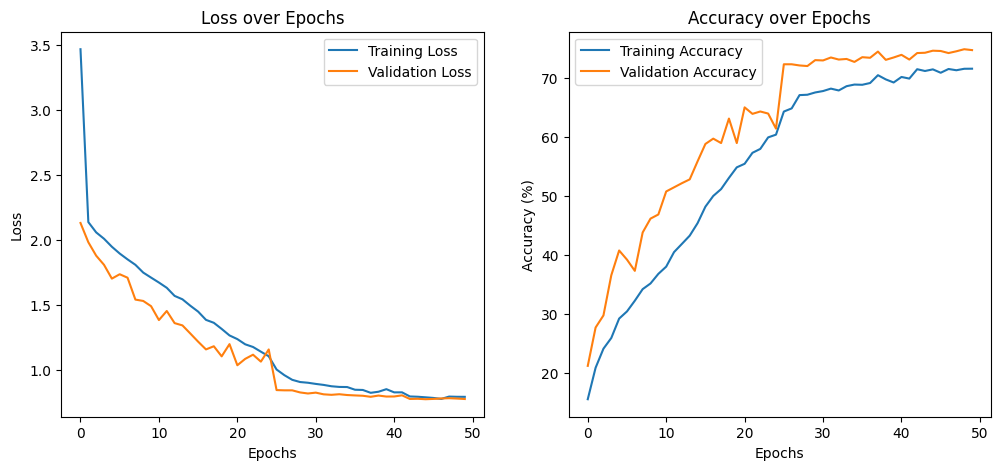

In [ ]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

### 4.2 Intra-class vs. Inter-class Variance Hypothesis (between my animals and Edward's butterflies)
##### The "Dog" challenge (high Intra-Class variance):
- I hypothesize that the model will struggle specifically with the "Dog" class because of intra-class variance. Unlike other animal classes like "chicken", "horse", or "cow" which have consistent structural features, dogs have massive diversity across different dog breeds. For example, the visual shape/features of a German Shepherd (pointy ears and long snout) are completely different to the features of breeds like Pugs or Chihuahuas.
- Metric Prediction: Therefore, I expect the Recall metric for dogs to be lower than the other classes. I feel that the model will struggle to generalize across visually distinct breeds resulting in false negatives. The model might classify a fluffy dog as another animal like a cat or sheep.

##### Comparison to Butterfly Classification
Comparing my task with my partner Edward's butterfly species classification task, I expect an interesting contrast between intra-class and inter-class variance. My model will likely struggle with the issue of "same animal different shapes" while his model will likely struggle with "different animals, same shape".
- Because most butterfly species share the same fundamental shape (wings and antennae), his model cannot use shape as a defining feature and must learn fine-grained texture details. In summary, my model might fail because a chihuahua doesn't look like a dog while his model might fail because two species of butterflies look the same (Ex. Viceroy vs Monarch butterflies)

### 4.3 Test Hypothesis
##### Get Metrics and create confusion matrix.
- Once again, I expect low recall from the dog class because of misclassifications. Also, I expect the confusion matrix to reflect these misclassifications in the dog "row"

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. GET ALL PREDICTIONS
y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Get class names for next cell (renamed for clarity)
class_names = unique_labels
print("Classes:", class_names)

Classes: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']



--- Classification Report ---
              precision    recall  f1-score   support

   butterfly       0.83      0.88      0.85       200
         cat       0.67      0.70      0.69       200
     chicken       0.88      0.81      0.84       200
         cow       0.67      0.68      0.67       200
         dog       0.56      0.60      0.58       200
    elephant       0.84      0.85      0.84       200
       horse       0.73      0.69      0.71       200
       sheep       0.74      0.69      0.72       200
      spider       0.81      0.79      0.80       200
    squirrel       0.76      0.78      0.77       200

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



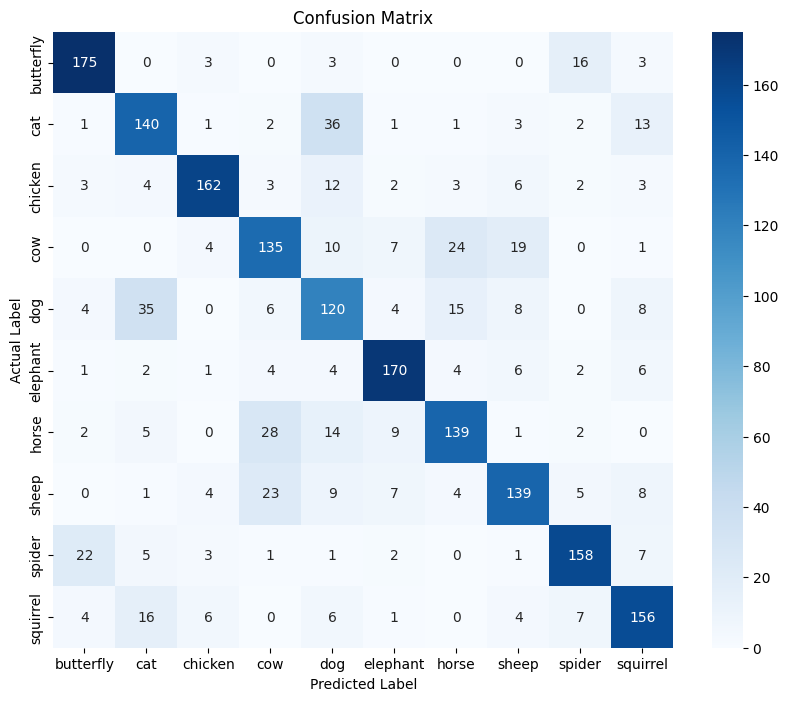

In [ ]:
# 2. CONFUSION MATRIX & REPORT
print("\n--- Classification Report ---")
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 3. HYPOTHESIS CHECK: DOGS VS CATS VS FARM ANIMALS

# Function to get accuracy for a specific class
def get_class_accuracy(class_name, y_true, y_pred, classes):
    if class_name not in classes:
        return 0.0
    idx = classes.index(class_name)
    # Indices where the item IS actually that class
    true_indices = [i for i, x in enumerate(y_true) if x == idx]
    # How many of those did we get right?
    correct = sum([1 for i in true_indices if y_pred[i] == idx])
    return correct / len(true_indices) * 100

# Function to show misclassified images (gives examples of misclassified animals)
def visualize_misclassifications(model, loader, true_label_name, pred_label_name, num_images=5):
    """
    Finds and displays images where the True Label is X but Predicted Label is Y.
    """
    # Get class indices
    class_names = unique_labels
    true_idx = class_names.index(true_label_name)
    pred_idx = class_names.index(pred_label_name)

    misclassified_images = []

    model.eval()
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # Find indices where True == target_true AND Pred == target_pred
            mask = (labels == true_idx) & (predicted == pred_idx)

            # If we found any matches in this batch
            if mask.sum() > 0:
                # Extract the specific images
                bad_images = images[mask]
                for img in bad_images:
                    misclassified_images.append(img.cpu())
                    if len(misclassified_images) >= num_images:
                        break

            if len(misclassified_images) >= num_images:
                break

    # Plotting:
    if len(misclassified_images) == 0:
        print(f"Good news! No {true_label_name}s were confused for {pred_label_name}s.")
        return

    print(f"Visualizing: True '{true_label_name}' predicted as '{pred_label_name}'")
    plt.figure(figsize=(15, 5))
    for i in range(len(misclassified_images)):
        # Un-normalize for display
        img = misclassified_images[i].permute(1, 2, 0).numpy()
        img = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406] # Undo normalization
        img = np.clip(img, 0, 1)

        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(f"True: {true_label_name}\nPred: {pred_label_name}", fontsize=10)
        plt.axis('off')
    plt.show()

In [ ]:
# Compare the specific animals
targets = ['dog', 'cat', 'cow', 'horse']
print("\n--- Hypothesis Check ---")
for animal in targets:
    if animal:
        acc = get_class_accuracy(animal, y_true, y_pred, class_names)
        print(f"{animal}: {acc:.2f}% Accuracy")
    else:
        print(f"Could not find class for '{animal}'")


--- Hypothesis Check ---
dog: 60.00% Accuracy
cat: 70.00% Accuracy
cow: 67.50% Accuracy
horse: 69.50% Accuracy


### 4.4 Fun Visual Check of Misclassified Dogs
- Includes number of dogs misclassified as cats


Found 35 Dogs misclassified as Cats.
Visualizing: True 'dog' predicted as 'cat'


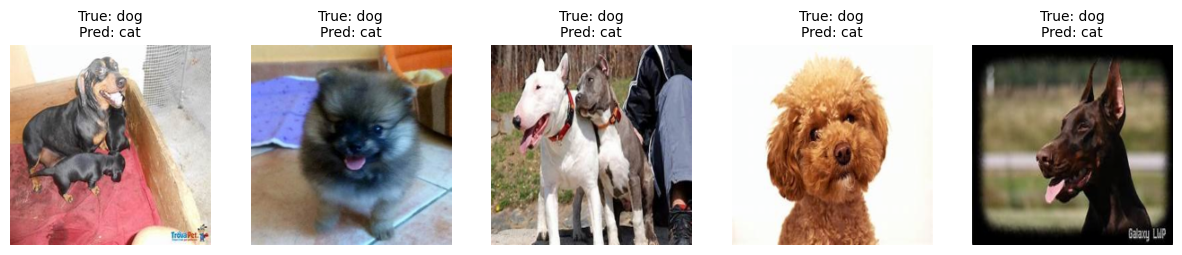

In [ ]:
# 4. VISUALIZE THE "CONFUSING" DOGS
# Find Dogs that were classified as Cats
dog_idx = next(i for i, name in enumerate(class_names) if 'dog' in name.lower())
cat_idx = next(i for i, name in enumerate(class_names) if 'cat' in name.lower())

# Find indices where True is Dog but Predicted is Cat
mistakes = [i for i, (t, p) in enumerate(zip(y_true, y_pred)) if t == dog_idx and p == cat_idx]

print(f"\nFound {len(mistakes)} Dogs misclassified as Cats.")
visualize_misclassifications(model, test_loader, 'dog', 'cat', num_images=5)


### 4.5 Check Cow, Sheep, and Horse (and Spider and Butterfly for fun)

Visualizing: True 'cow' predicted as 'sheep'


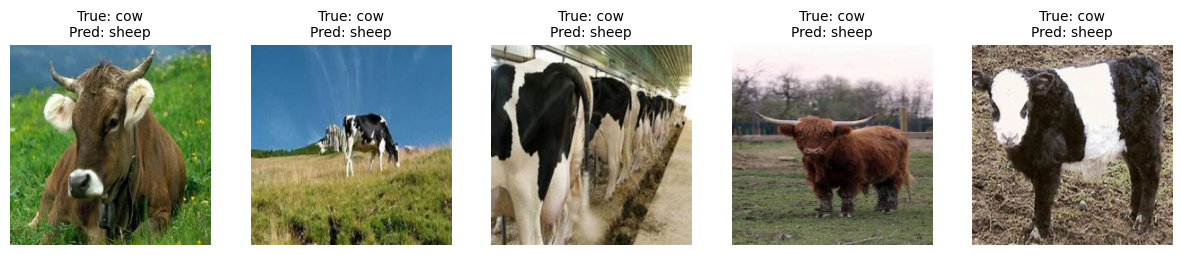

Visualizing: True 'sheep' predicted as 'cow'


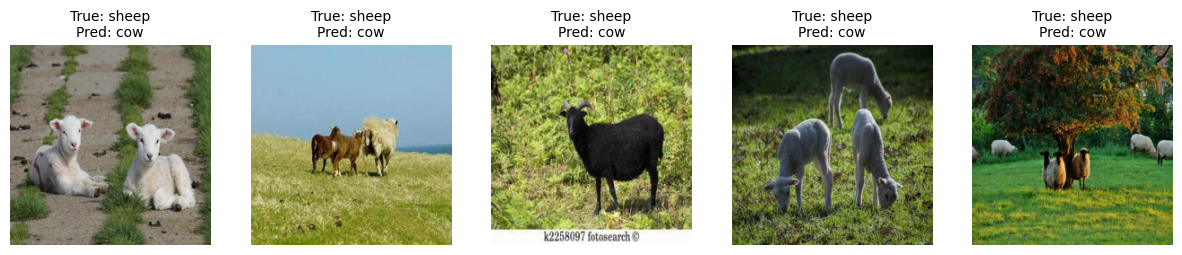

Visualizing: True 'cow' predicted as 'horse'


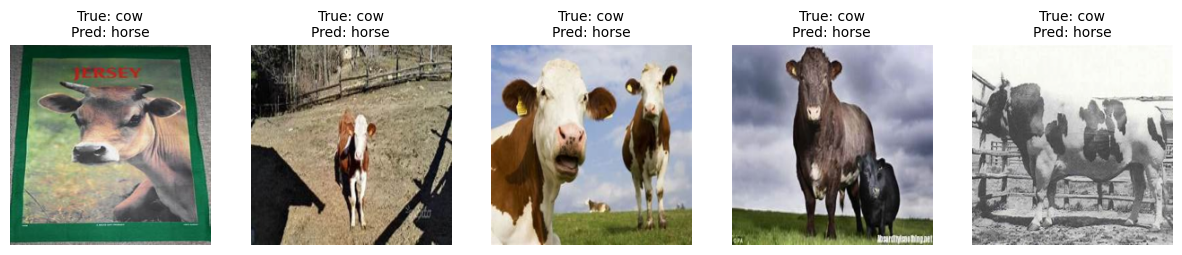

Visualizing: True 'spider' predicted as 'butterfly'


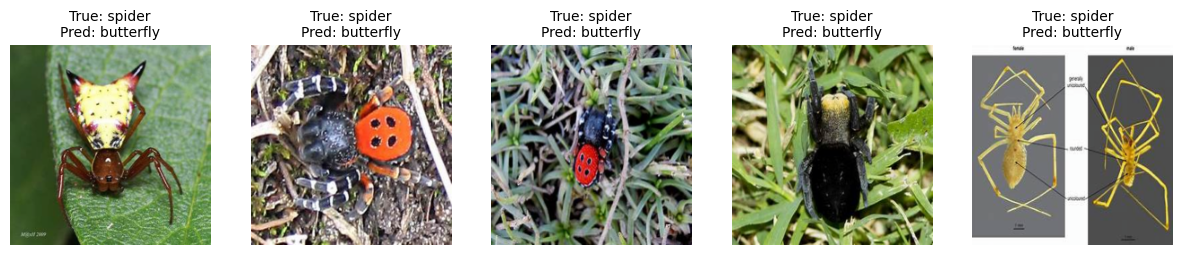

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# --- RUN THE VISUAL CHECKS ---

# Check 1: Cow -> Sheep (Do they share green grass?)
visualize_misclassifications(model, test_loader, 'cow', 'sheep', num_images=5)

# Check 2: Sheep -> Cow (Vice Versa)
visualize_misclassifications(model, test_loader, 'sheep', 'cow', num_images=5)

# Check 3: Cow -> Horse (Similar size + Grass?)
visualize_misclassifications(model, test_loader, 'cow', 'horse', num_images=5)

# Fun Check:
visualize_misclassifications(model, test_loader, 'spider', 'butterfly', num_images=5)

## 4.6 Ranking Model Performance by Class
- See overall which animals the model excels with classifying and which the model suffers with.

In [ ]:
# Create a list to store the performances
class_performance = []

# Iterate through ALL classes (using unique_labels from earlier)
for class_name in unique_labels:
    # Calculate accuracy using the helper function
    acc = get_class_accuracy(class_name, y_true, y_pred, unique_labels)
    class_performance.append((class_name, acc))

# Sort the list by Accuracy in desc order
class_performance.sort(key=lambda x: x[1], reverse=True)

print("\n--- All Classes Ranked by Accuracy ---")
for class_name, acc in class_performance:
    print(f"{class_name}: {acc:.2f}%")


--- All Classes Ranked by Accuracy ---
butterfly: 87.50%
elephant: 85.00%
chicken: 81.00%
spider: 79.00%
squirrel: 78.00%
cat: 70.00%
horse: 69.50%
sheep: 69.50%
cow: 67.50%
dog: 60.00%


## Final Thoughts / Observations / Conclusions
#### Intra-class Variance (dogs)
- Dogs were the most difficult class for the model to classify due to diversity in breeds of dogs. Though they look completely different, a Chihuahua and a German Shepherd both fall under the "dog" class and so what constitutes a "dog" to the model is not as clear as some of the other classes like "butterfly" and "elephant".

- Because most butterflies generally have the same distinct shape despite the differences in butterfly species, for example, the model is able to more accurately classify butterflies. My CNN model can more easily identify the shape of the butterfly as an indicative feature whereas with dogs, the model cannot rely on shape much because of the diversity of shapes in different dog breeds.
#### Overall
- Visual similarity between animals plays a huge role in how well the model is able to classify the 10 different animals. The animals that the model performed the worst on are animals that either have high intra-class variance (dogs) or look similar (cow, sheep, horse).

- Beyond visual similarity of the animals themselves, cows, sheep, and horses are all farm animals and it is very likely the backgrounds/scenery of their pictures are quite similar (pastures, etc). On the other hand, the model performed well in classifying animals that look more distinct compared to the other animals (butterflies, elephants, chicken).

- Even among butterflies and spiders, my point regarding the significance of visual similarity still stands. Butterflies and spiders look the most visually similar compared to the rest of the animals and as the confusion matrix shows, the majority of misclassified butterflies were classified by the model as spiders. I would expect that had spiders were removed from the dataset that the model would be even more accurate at classifiying butterflies because of the lack of other animals that are similar. Conversely, if more insect-based animals were added to the dataset, I would expect the accuracies for all insect animals to suffer just as the accuracies for the farm animals suffered.